In [239]:
import os
import numpy as np
from PIL import Image
import json
import pickle
import torch
from collections import defaultdict

dataset = 'fashioniq' # fashioniq, shoe
mode = 'jointcomp' # jointcomp, joint

scale = 1
if dataset=='fashioniq' and mode == 'sepcomp':
    scale = -1

### YOUR DATASET HERE
if dataset == 'fashioniq':
    img_root = '../dataset/fashioniq/resized_images' 
elif dataset == 'shoe':
    img_root = '../dataset/shoe/resized_images'
    
def recall(actual, predicted, k):
    act_set = set([actual])
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(len(act_set))
    return result

In [240]:
if dataset == 'fashioniq':
    logdirs = ['fashioniq_dcnet']   ### YOUR LOGDIR HERE
elif dataset == 'shoe':
    logdirs = ['shoe_dcnet']
val = True 
comp_mats, corr_mats = {}, {}
i_ids, cap_data = {}, {}
for log in logdirs:
    if val:
        result = torch.load('../logdir/%s/best_score.pt'%log)
    else:
        result = torch.load('../logdir/%s/test/test_score.pt'%log)
    for cat in result['score']:
        comp_mats[cat] = result['score'][cat]['matrix_comp']
        corr_mats[cat] = result['score'][cat]['matrix_corr']

        i_ids[cat] = result['score'][cat]['ids']
        cap_data[cat] = result['score'][cat]['meta_info'] # key: candidate, target, captions
        

## Qualitative Results

In [234]:
idx=0
cat = 'dress'
if mode == 'joint':
    score = (comp_mats[cat] + corr_mats[cat])
elif mode == 'jointcomp':
    score = comp_mats[cat]
elif mode == 'jointcorr':
    score = corr_mats[cat]
ranks=score.argsort(dim=1, descending=True)

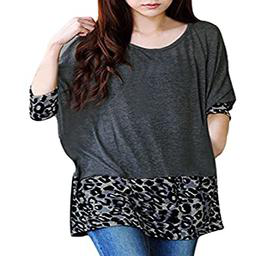

['is yellow with fringe', 'is yellow with shorter sleeves']


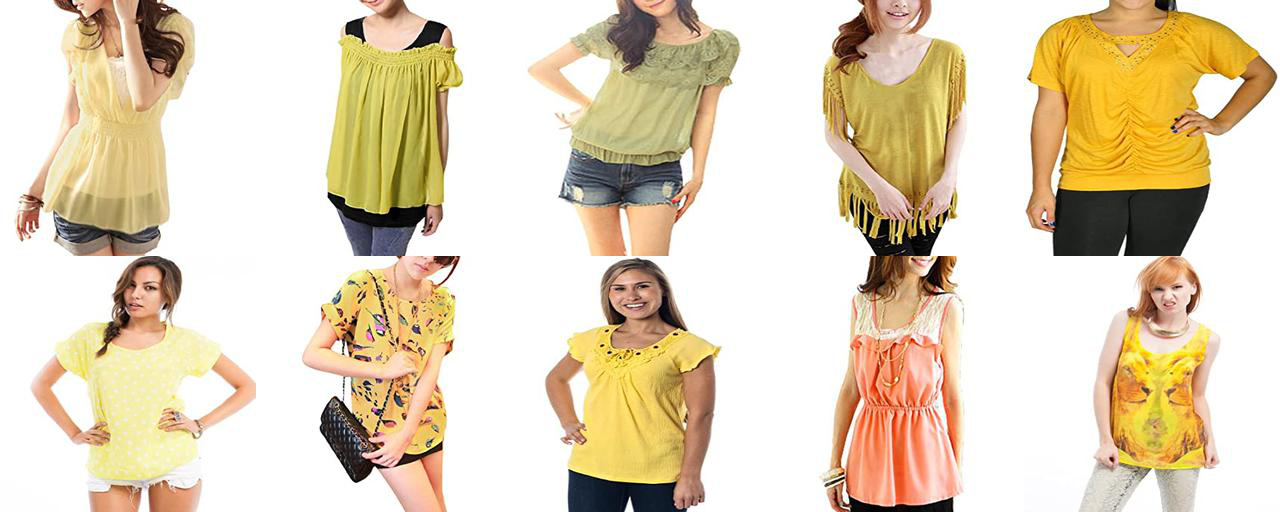

answer


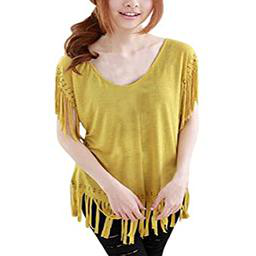

In [235]:
# idx -=4
idx+=2
cnd_id = cap_data[cat][idx]['candidate']
caps = cap_data[cat][idx]['captions']
cnd_im = Image.open(os.path.join(img_root, cnd_id+'.jpg'))
display(cnd_im)
print(caps)

new_im = Image.new('RGB', (256*5, 256*2))
x_offset = 0
for r in range(10):
    res_id = i_ids[cat][ranks[idx][r]]
    res_im = Image.open(os.path.join(img_root, res_id+'.jpg'))
    new_im.paste(res_im, (x_offset%(256*5), 256*(r//5)))
    x_offset += res_im.size[0]
display(new_im)

if val:
    print("answer")
    cnd_im = Image.open(os.path.join(img_root, cap_data[cat][idx]['target']+'.jpg'))
    display(cnd_im)